In [32]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.ChangingEpsilons import Bandit
from ipynb.fs.full.OptimisticInitialValues import run_experiment_oiv
from ipynb.fs.full.UCB1 import run_experiment_ucb

In [33]:
class BayesianBandit:
    def __init__(self, true_mean):
        self.predicted_mean = 0
        #self.N = 1
        self.tau = 1
        self.lambda_ = 1
        self.sum_x = 0
        self.true_mean = true_mean
    
    def pull(self):
        return np.random.randn() + self.true_mean
    
    def sample(self):
        return np.random.randn() / np.sqrt(self.lambda_) + self.predicted_mean
    
    def update(self, x):
        self.lambda_ += self.tau
        self.sum_x += x
        self.predicted_mean = self.tau * self.sum_x / self.lambda_

In [34]:
def run_experiment_decaying_epsilon(m1, m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    
    data = np.empty(N)
    
    for i in range(N):
        p = np.random.random()
        if p < 1.0/(i+1):
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
    
        data[i] = x
    cumulative_avg = np.cumsum(data)/(np.arange(N) + 1)  
    
    # plot moving average ctr
    plt.plot(cumulative_avg)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print(b.mean)

    return cumulative_avg

In [35]:
def run_experiment(m1, m2, m3, N):
    bandits = [BayesianBandit(m1), BayesianBandit(m2), BayesianBandit(m3)]
    
    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
    
        data[i] = x
    cumulative_avg = np.cumsum(data)/(np.arange(N) + 1)  
    
    # plot moving average ctr
    plt.plot(cumulative_avg)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    return cumulative_avg


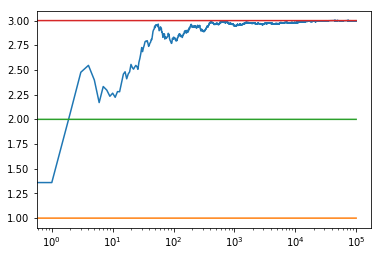

2.7197317539354184
2.8389987239622476
2.9987075972395174


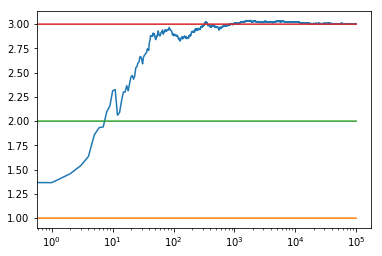

1.039492638119706
1.2448532757469404
3.00378511381254


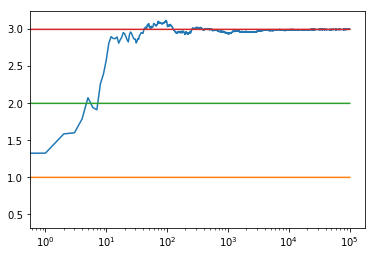

0.03894960132099545
2.0505130128784983
3.0014199328174986


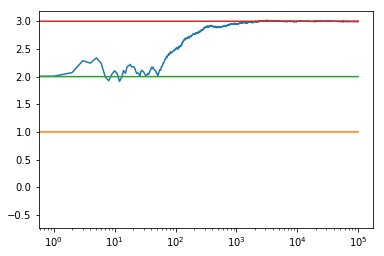

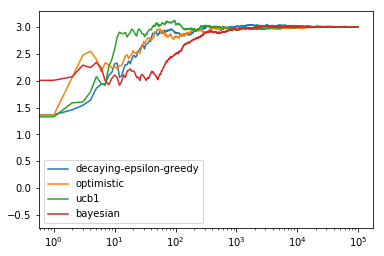

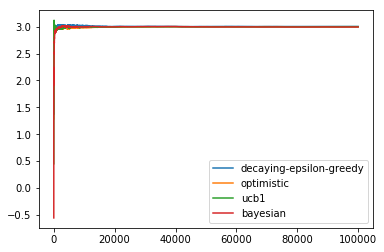

In [36]:
if __name__ == '__main__':
    oiv = run_experiment_oiv(1.0, 2.0, 3.0, 100000)
    eps = run_experiment_decaying_epsilon(1.0, 2.0, 3.0, 100000)
    ucb = run_experiment_ucb(1.0, 2.0, 3.0, 100000)
    bayes = run_experiment(1.0, 2.0, 3.0, 100000)
    
    # log scale plot
    plt.plot(eps, label='decaying-epsilon-greedy')
    plt.plot(oiv, label='optimistic')
    plt.plot(ucb, label='ucb1')
    plt.plot(bayes, label='bayesian')
    plt.legend()
    plt.xscale('log')
    plt.show()


    # linear plot
    plt.plot(eps, label='decaying-epsilon-greedy')
    plt.plot(oiv, label='optimistic')
    plt.plot(ucb, label='ucb1')
    plt.plot(bayes, label='bayesian')
    plt.legend()
    plt.show()